In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py


In [2]:
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [3]:
def load_dir_reduced(dirname,file_prefix,max_files):
    '''
    Load time information from the h5 files in a loop into a list. Step size is fixed to 100. 
    '''   
    ## Load all filenames in directory
    var_list1 = []
    var_list2 = []
    var_list3 = []
    files = []
    [files.append(file_) for file_ in os.listdir(dirname) if file_.startswith(file_prefix) if file_.endswith('.h5')]
    files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    print(len(files))
    step_size = 50
    for j in np.arange(0,max_files,step_size):
        for filename in files[j:j+step_size]:
            BDFs = BDF.BeadDataFile(dirname+filename)
            var_list1.append(BDFs.x2)
            var_list2.append(BDFs.cant_pos[1])
            var_list3.append(BDFs.y2)
    return var_list1,var_list2,var_list3

In [4]:
def add_seismometer(df,dirname,file_prefix,max_files):
    files = []
    var_list = []

    [files.append(file_) for file_ in os.listdir(dirname) if file_.startswith(file_prefix) if file_.endswith('.h5')]
    files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    print(len(files))
    step_size = 50
    for j in tqdm(np.arange(0,max_files,step_size)):
        for filename in files[j:j+step_size]:
            BDFs = BDF.BeadDataFile(dirname+filename)
            var_list.append(BDFs.seismometer)
    df["Acc"] = var_list        
    return df

In [5]:
def data_to_amp_and_phase_single_axis(data,fsamp,res):
    data_det=signal.detrend(data)
    freqs=np.linspace(0,int(fsamp/2),(int(res/2))+1)    # change
    FFT=np.fft.rfft(data_det)
    norm = np.sqrt(2 / (res* fsamp))
    PSD = norm**2 * (FFT * FFT.conj()).real
    Phase =np.angle(FFT)
    return PSD,Phase

## verification of the methods comparability to previously used mlab.psd

# fsamp=5000
# res=50000
# data=f[0].x2
# a = data_to_amp_and_phase_single_axis(data,fsamp,res)
# b = matplotlib.mlab.psd(signal.detrend(data), Fs = fsamp, NFFT = res, window = mlab.window_none)
# plt.loglog(a[0],a[1])
# plt.loglog(b[1],b[0],alpha=0.5)

In [6]:
def extract_data_to_df(folderName,filePrefix,maxFiles=1000,filterStd=True,calibrationFactorX=1,calibrationFactorY=1,fsamp=5000,res=50000):
    start=time.time()

    df= pd.DataFrame()
    fsamp=fsamp
    res=res
    freqs=np.linspace(0,int(fsamp/2),(int(res/2))+1)
    x2L,cPL,y2L = load_dir_reduced(folderName,file_prefix=filePrefix,max_files=maxFiles)
    xAmpList,xPhaseList = loop_extract_PSD_and_phase(x2L,fsamp,res,calibrationFactorX)
    yAmpList,yPhaseList = loop_extract_PSD_and_phase(y2L,fsamp,res,calibrationFactorY)
    
    df["cantPosY"] = cPL
    
    df["xAmp"] = x2L
    df["xPhase"] = xPhaseList
    df["xPSD"] = xAmpList
    #df["xASD"]=df["xPSD"].apply(lambda element: np.sqrt(element))
    
    df["yAmp"] = y2L
    df["yPhase"] = yPhaseList
    df["yPSD"] = yAmpList
    #df["yASD"]=df["yPSD"].apply(lambda element: np.sqrt(element))
    
    
    df["checkStd"]=df["xAmp"].apply(lambda element: np.std(element))
    

    if(filterStd==True):
        df=df[df["checkStd"]<20*df["checkStd"].median()]
    print("The process took %.2f" %(time.time()-start))
    print(df.info(memory_usage='deep'))

    return freqs,df

In [7]:
def loop_extract_PSD_and_phase(inList,fsamp,res,calibrationFactor=1):
    ampList = []
    phaseList=[]
    for i in range(len(inList)):
        data=inList[i]/calibrationFactor
        temp_ = data_to_amp_and_phase_single_axis(data,fsamp,res)
        ampList.append(temp_[0])
        phaseList.append(temp_[1])
    return ampList,phaseList

In [8]:
folderName="/data/new_trap/20200320/Bead1/Shaking/Shaking378/" 
filePrefix="Shaking3"
freqs,df_ShakingW = extract_data_to_df(folderName,filePrefix,maxFiles=5000,filterStd=True,calibrationFactorX=6e4,calibrationFactorY=3.5e5)
#df_ShakingW.to_pickle("Results/NoShaking_0_20220613.npy")

10000
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seism

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer

No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer data
No z_set data
No seismometer

In [9]:
def plotQuickAlternatemethod(fundamental,df_1,df_2,label1,label2,offset,lowylim=1e-10,upylim=1e-4,lowxlim=10,upxlim=150,scaleFactor1=1,scaleFactor2=1,res=50000,fsamp=5000):

    data1=data_to_amp_and_phase_single_axis(df_1["xAmp"].sum(),5000,50000)[0]
    data2=data_to_amp_and_phase_single_axis(df_2["xAmp"].sum(),5000,50000)[0]            
    xlabel="frequency [Hz]"
    ylabel="%s sumPSD [a.u.]"
    plt.plot(freqs,data1/scaleFactor1,color="black",alpha=1,lw=3,label=label1)
    plt.plot(freqs,data2/scaleFactor2,color="red",alpha=0.5,lw=3,label=label2)
    plt.yscale("log")
    plt.xlim(lowxlim,upxlim)
    plt.ylim(lowylim,upylim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.legend()
    plt.show()

    plt.plot(freqs[fundamental*int(res/fsamp)::fundamental*int(res/fsamp)],(data1/scaleFactor1)[fundamental*int(res/fsamp)::fundamental*int(res/fsamp)],color="black",alpha=1,lw=3,marker="*",ms=15,label=label1)
    plt.plot(freqs[fundamental*int(res/fsamp)::fundamental*int(res/fsamp)],(data2/scaleFactor2)[fundamental*int(res/fsamp)::fundamental*int(res/fsamp)],color="red",alpha=0.7,lw=3,marker="*",ms=15,label=label2)

    plt.plot(freqs[(fundamental+offset)*int(res/fsamp)::(fundamental+offset)*int(res/fsamp)],(data1/scaleFactor1)[(fundamental+offset)*int(res/fsamp)::(fundamental+offset)*int(res/fsamp)],color="blue",alpha=0.7,lw=3,ls="dashed",marker="*",ms=15,label=label1+" off-axis check at %d" %(fundamental+offset))
    plt.plot(freqs[(fundamental+offset)*int(res/fsamp)::(fundamental+offset)*int(res/fsamp)],(data2/scaleFactor2)[(fundamental+offset)*int(res/fsamp)::(fundamental+offset)*int(res/fsamp)],color="blue",alpha=0.7,lw=3,ls="dotted",marker="*",ms=15,label=label2+" off-axis check at %d"%(fundamental+offset))

    plt.yscale("log")
    plt.xlim(lowxlim,upxlim)
    plt.ylim(lowylim,upylim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()                       

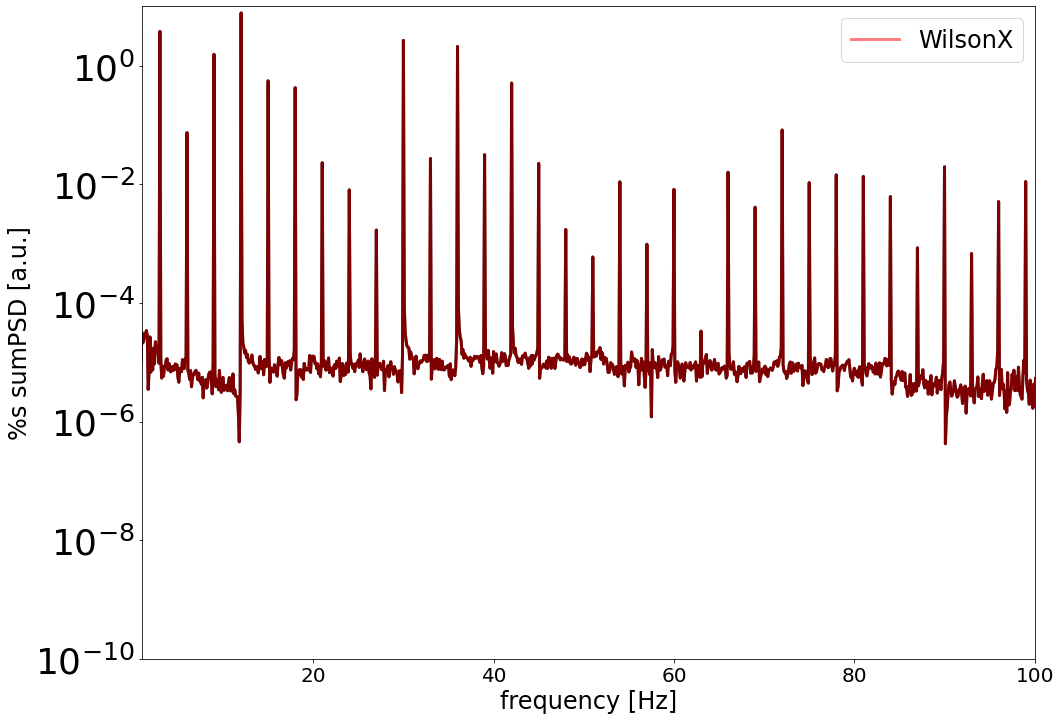

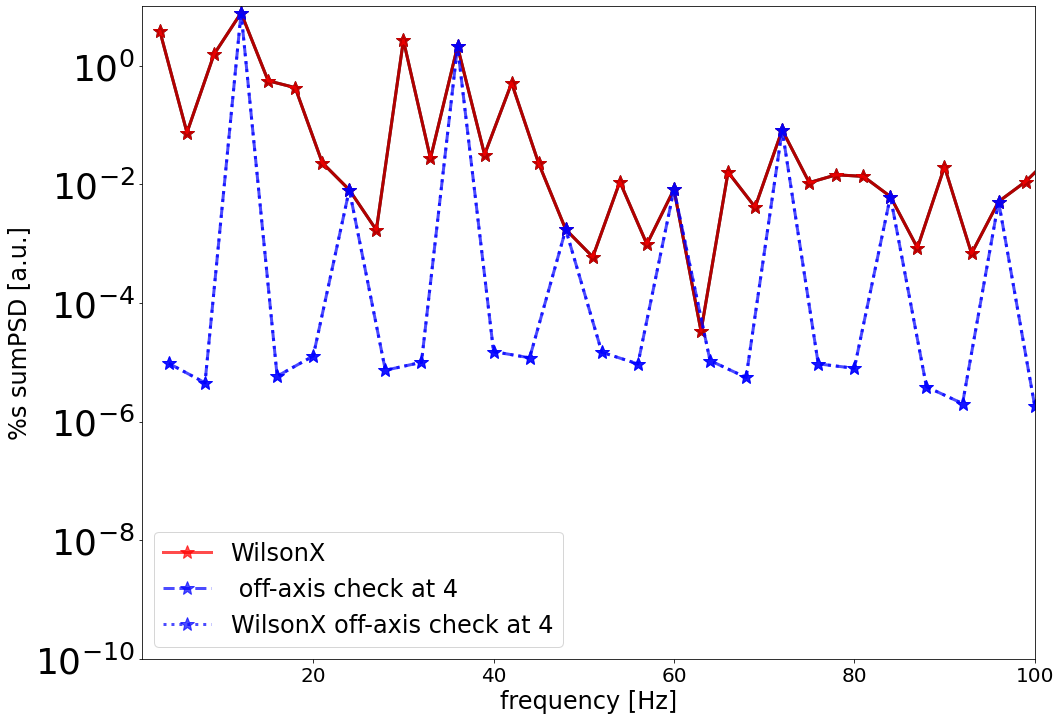

In [23]:
plotQuickAlternatemethod(3,df_ShakingW,df_ShakingW,label1="",label2="WilsonX",offset=1,lowxlim=1,upxlim=100,upylim=10)

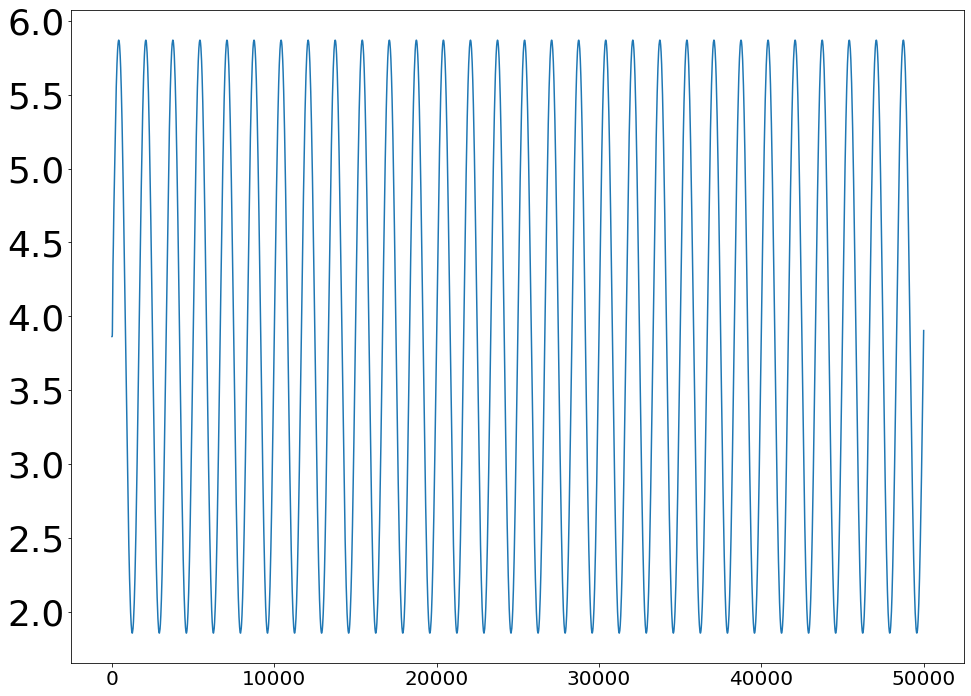

In [11]:
plt.plot(df_ShakingW["cantPosY"][0])

In [12]:
# transform the drive into phases
def add_driveFFT_for_harmonics(df,frequency):
    df["driveFFT"] = df["cantPosY"].apply(lambda element: data_to_amp_and_phase_single_axis(element,fsamp,res)[1][frequency*int(res/fsamp)::frequency*int(res/fsamp)])
    return df

In [13]:
fsamp=5000
res=50000
df_ShakingW=add_driveFFT_for_harmonics(df_ShakingW,3)
#df_Shaking3=add_driveFFT_for_harmonics(df_Shaking3,3)

In [14]:
df_Shaking13=np.load("Results/Shaking_1_20220526.npy",allow_pickle=True)

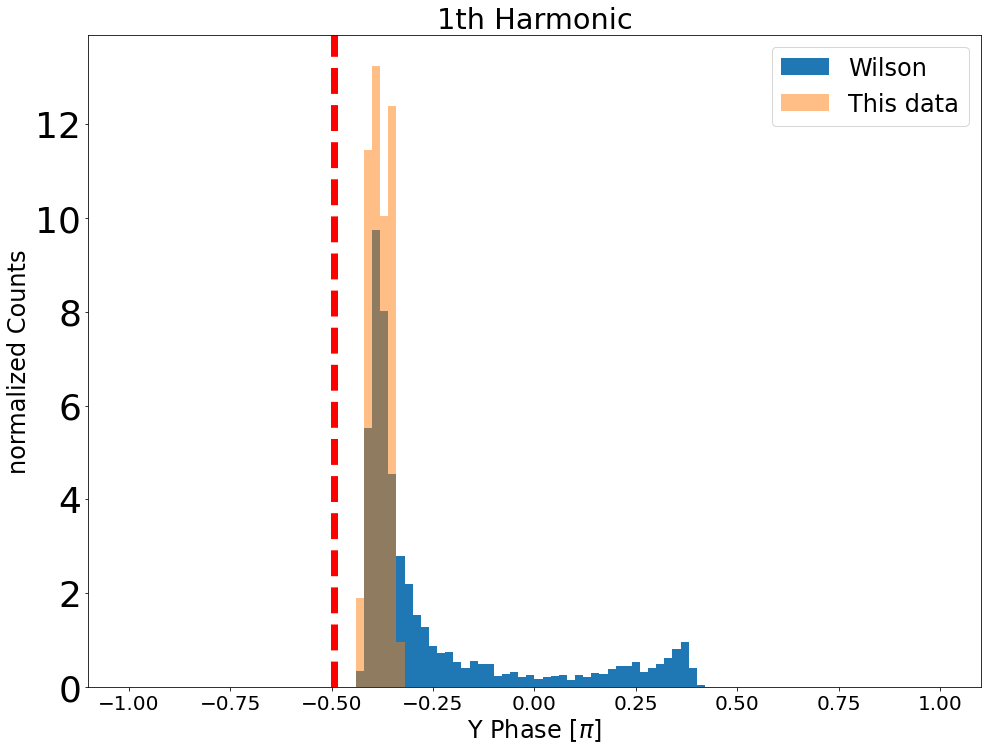

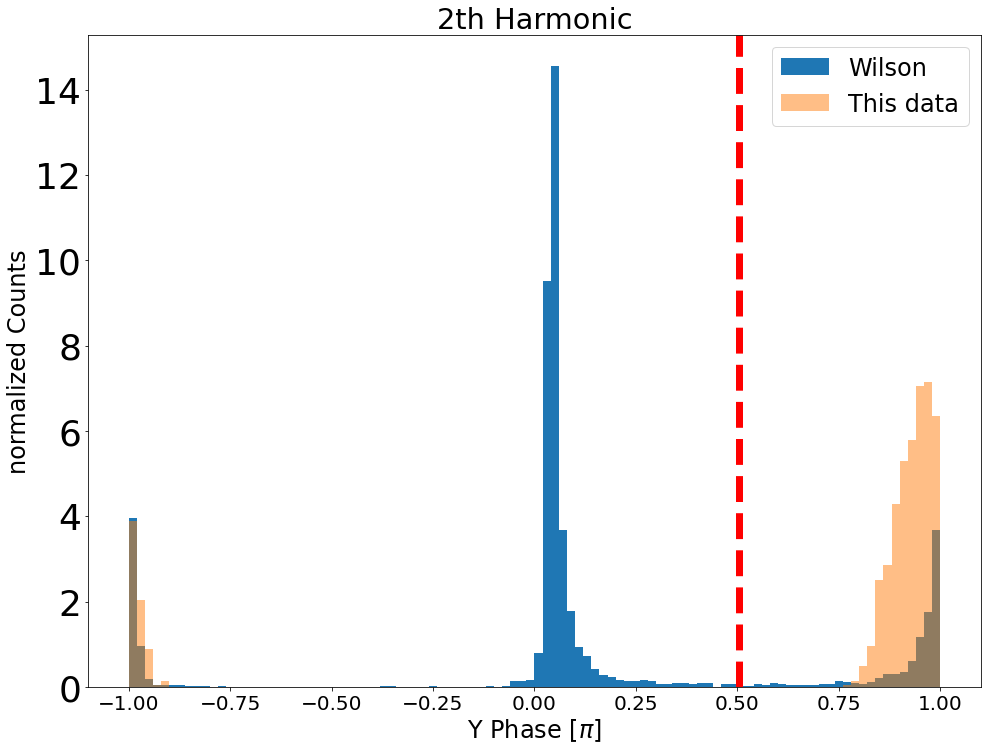

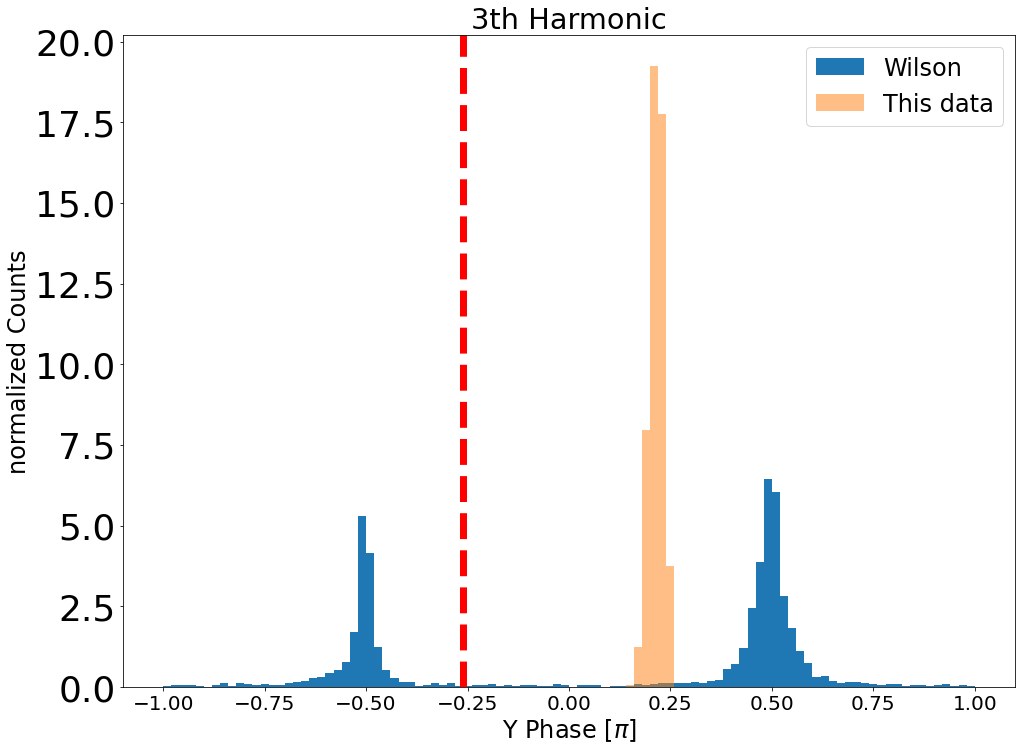

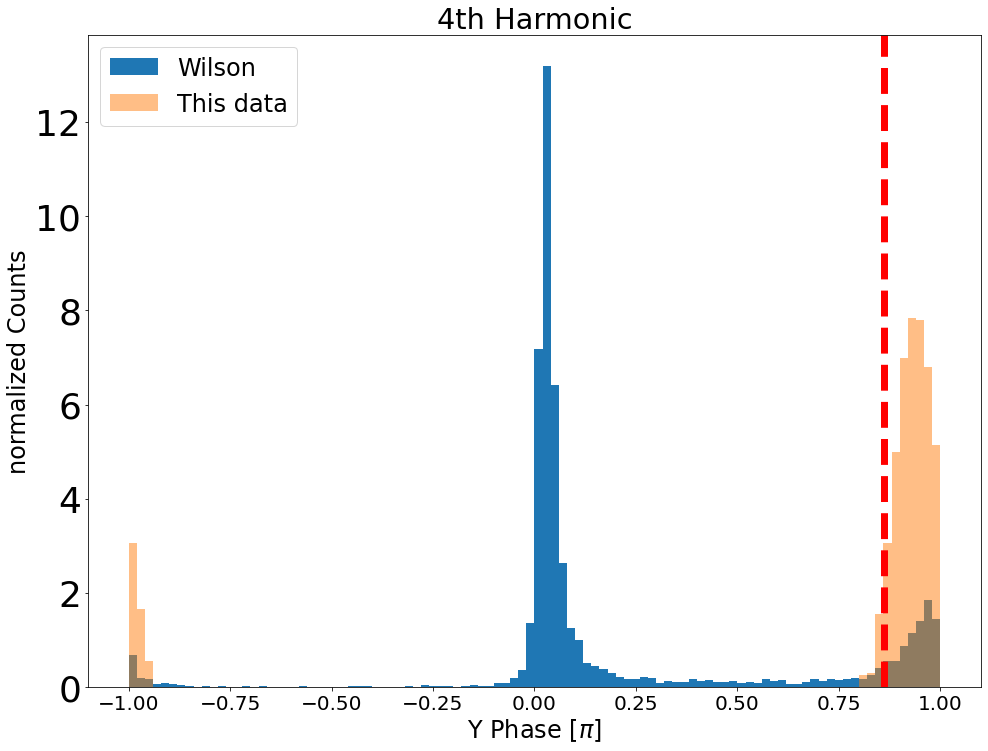

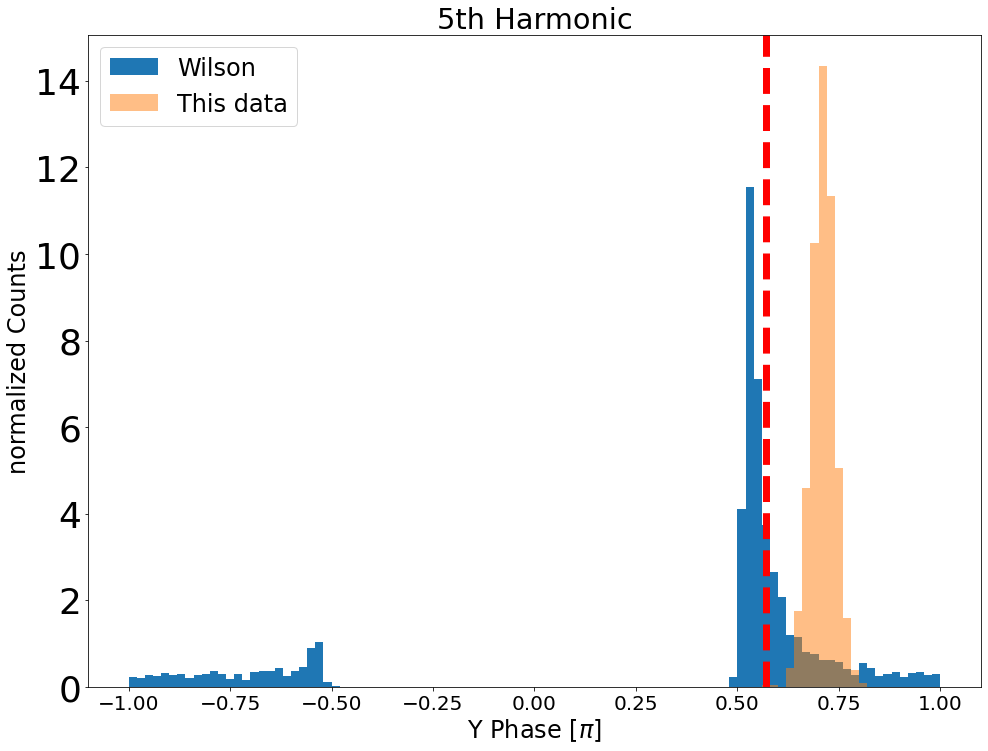

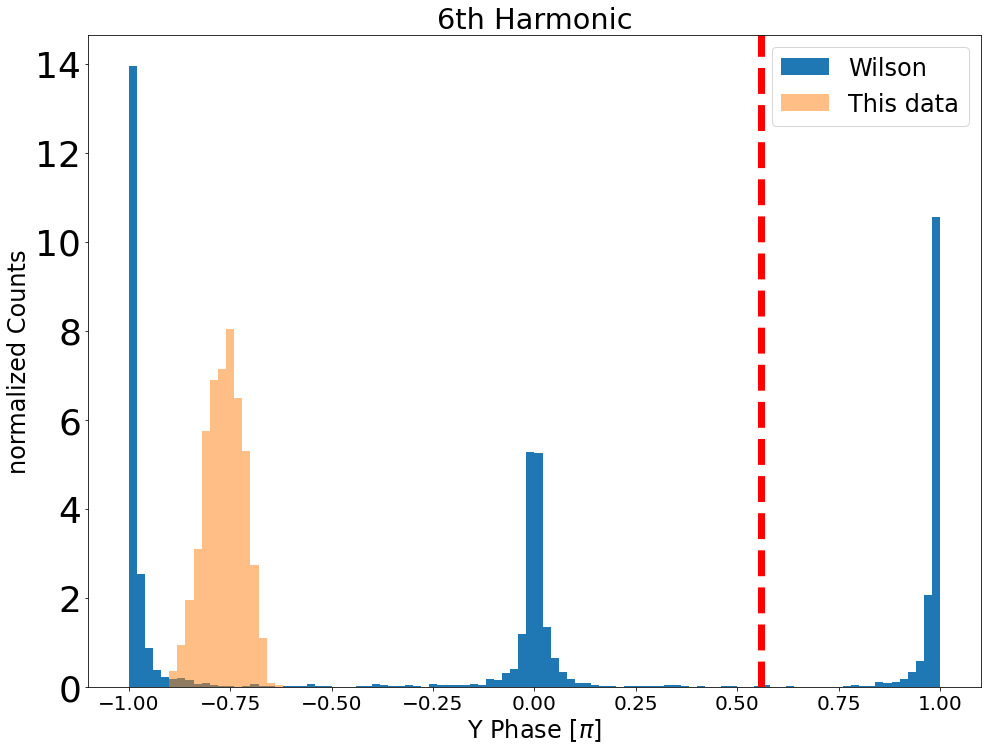

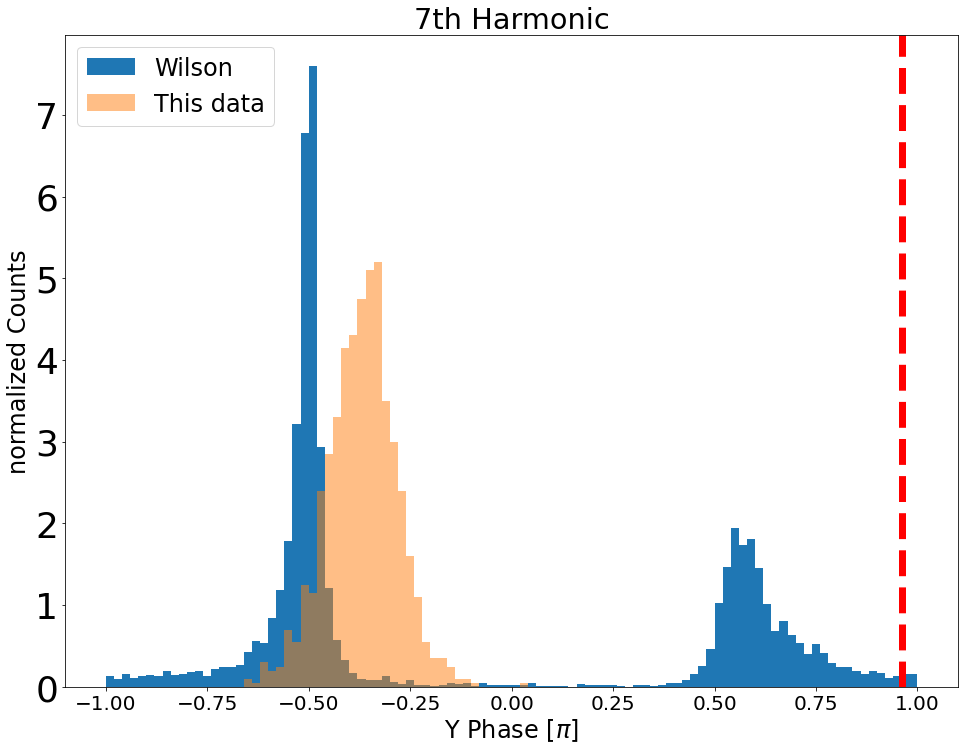

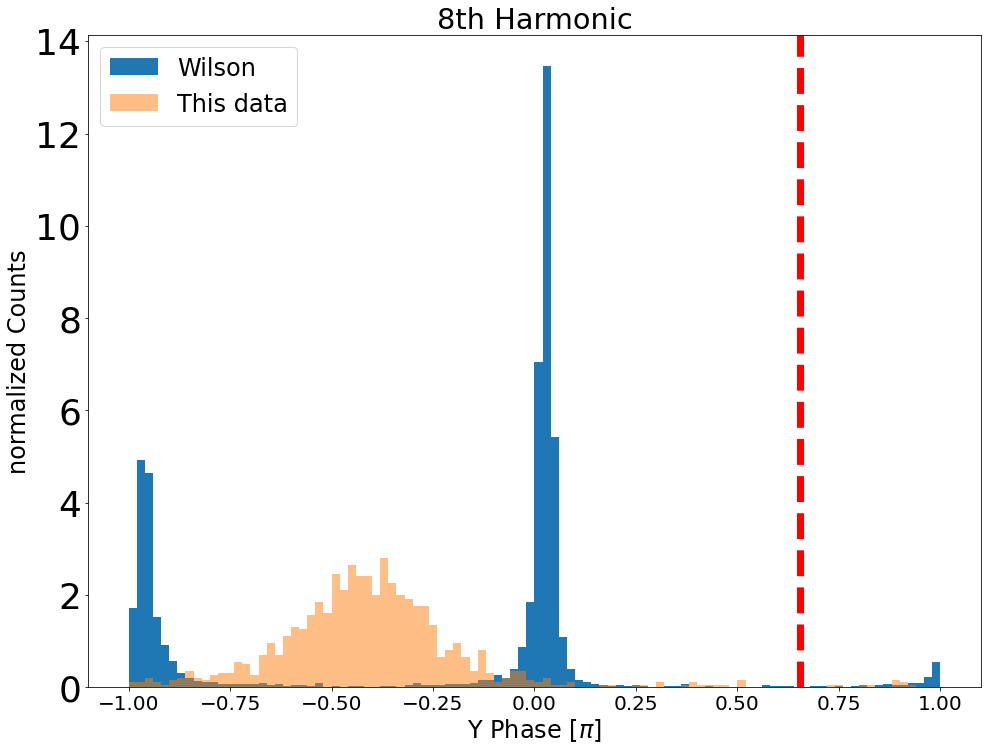

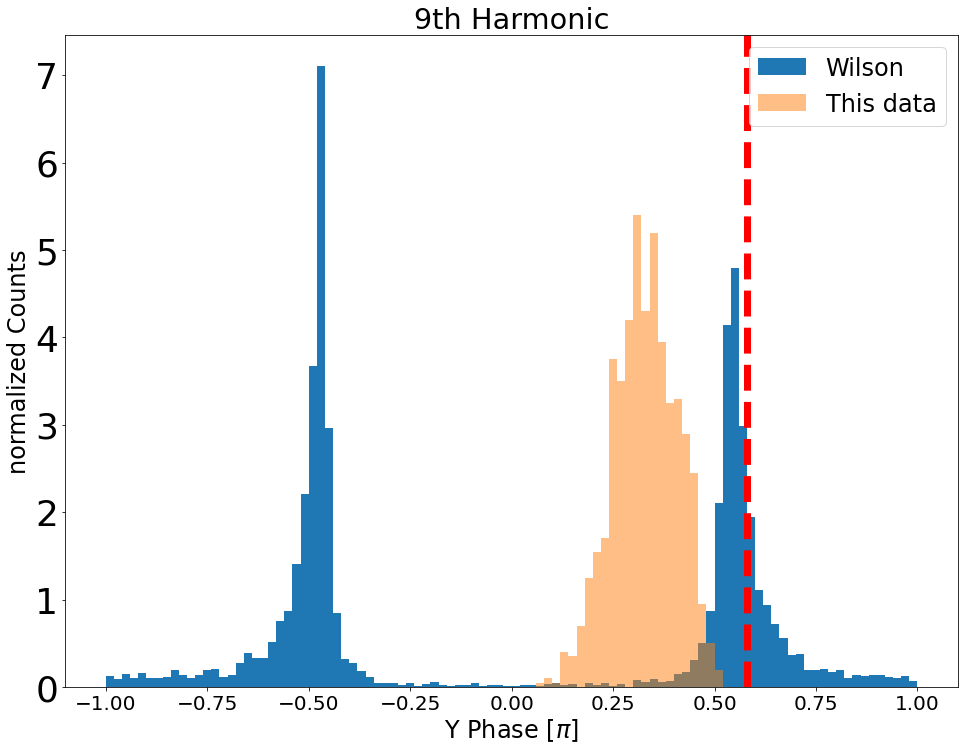

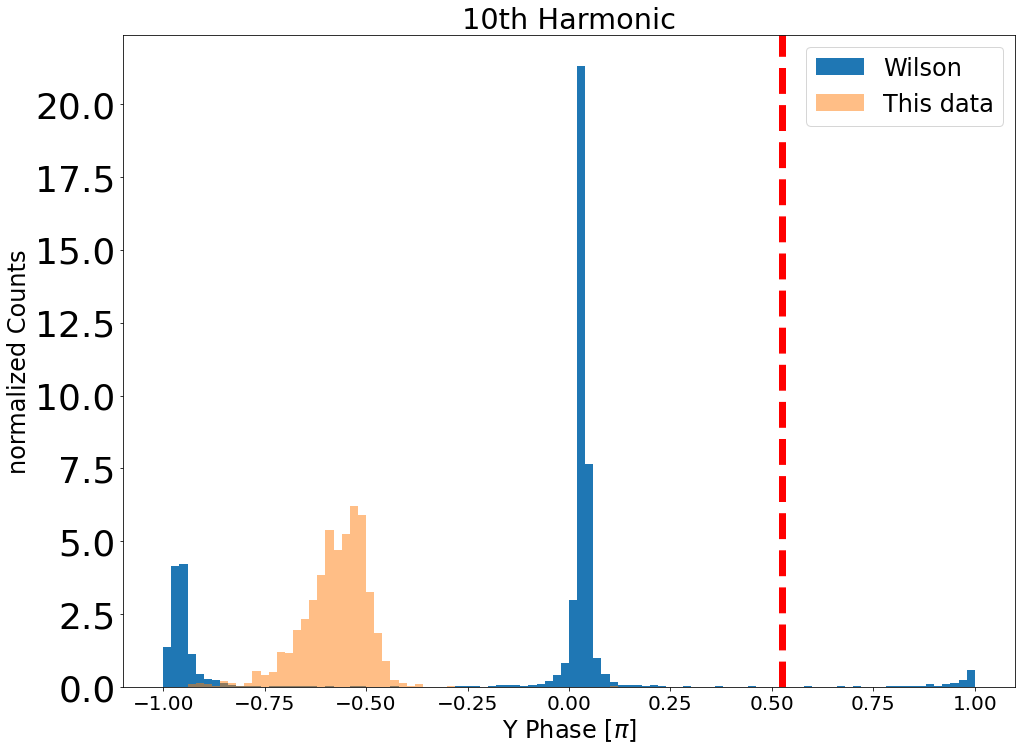

In [25]:
frequency=3
df0=df_ShakingW
df1=df_Shaking13

for j in range(10):
    PhaseListY0 = []
    PhaseListY1 = []
    for i in range(len(df0)):
        PhaseListY0.append(df0["yPhase"][i][int(res/fsamp)*frequency*(j+1)]/np.pi)
    for i in range(len(df1)):
        PhaseListY1.append(df1["yPhase"][i][int(res/fsamp)*13*(j+1)]/np.pi)
    plt.title("%sth Harmonic" %(j+1))    
    plt.xlabel("Y Phase [$\pi$]")
    plt.ylabel("normalized Counts")
    plt.hist(PhaseListY0,bins=100,range=(-1,1),label="Wilson",density=True)
    plt.hist(PhaseListY1,bins=100,range=(-1,1),label="This data",alpha=0.5,density=True)
    plt.axvline(df0["driveFFT"][0][j]/np.pi,ls="dashed",color="red",lw=7)
    plt.legend()
    plt.show()

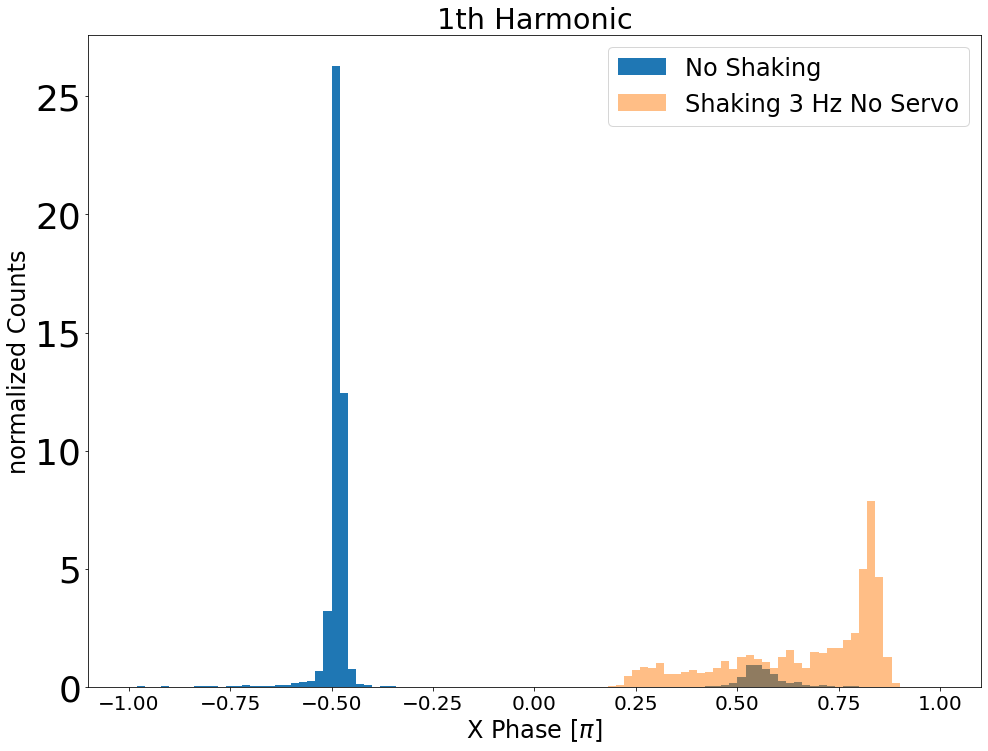

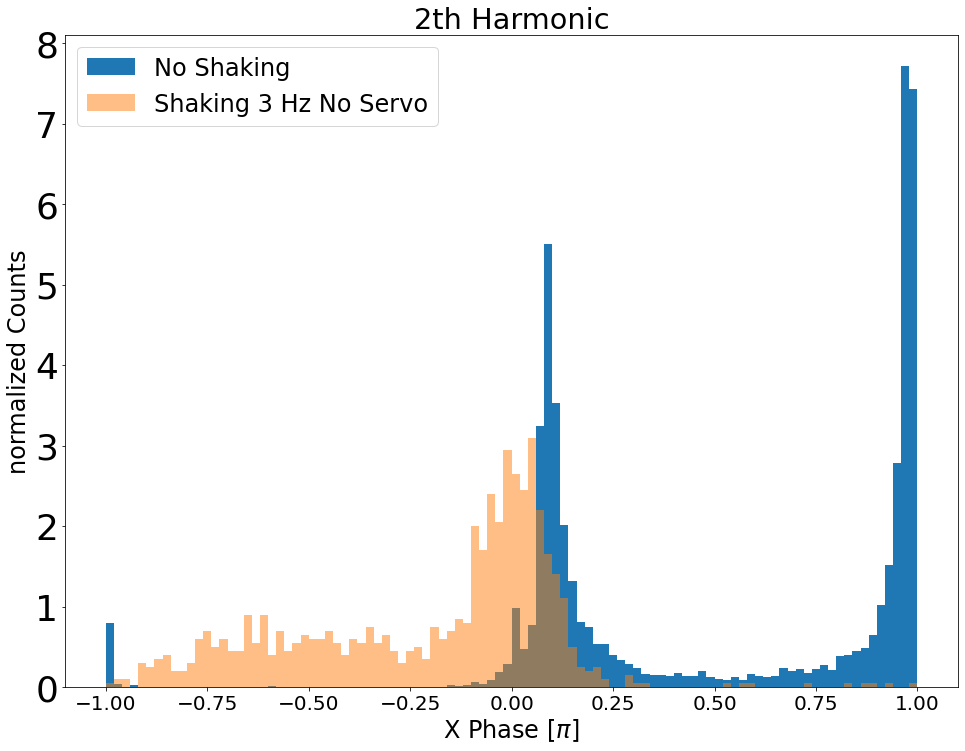

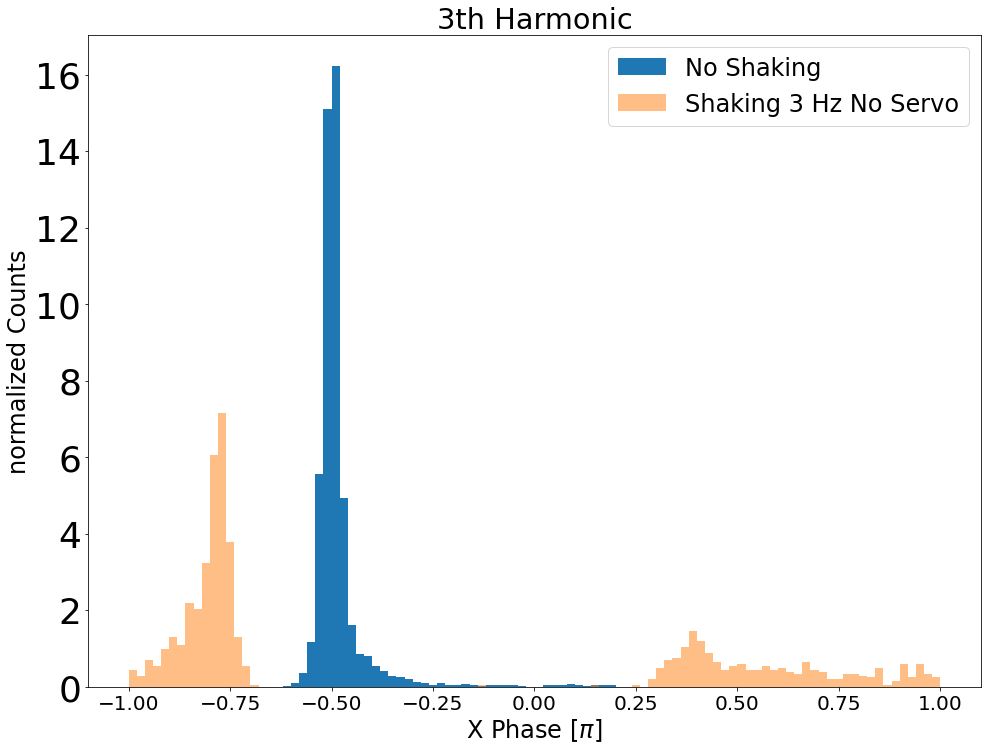

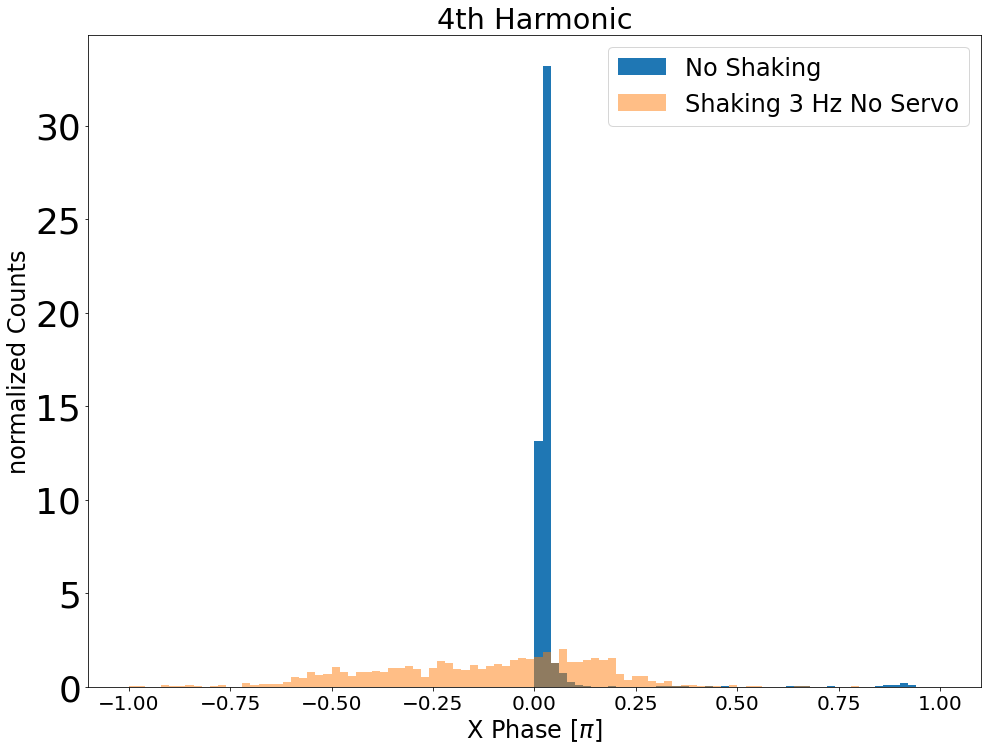

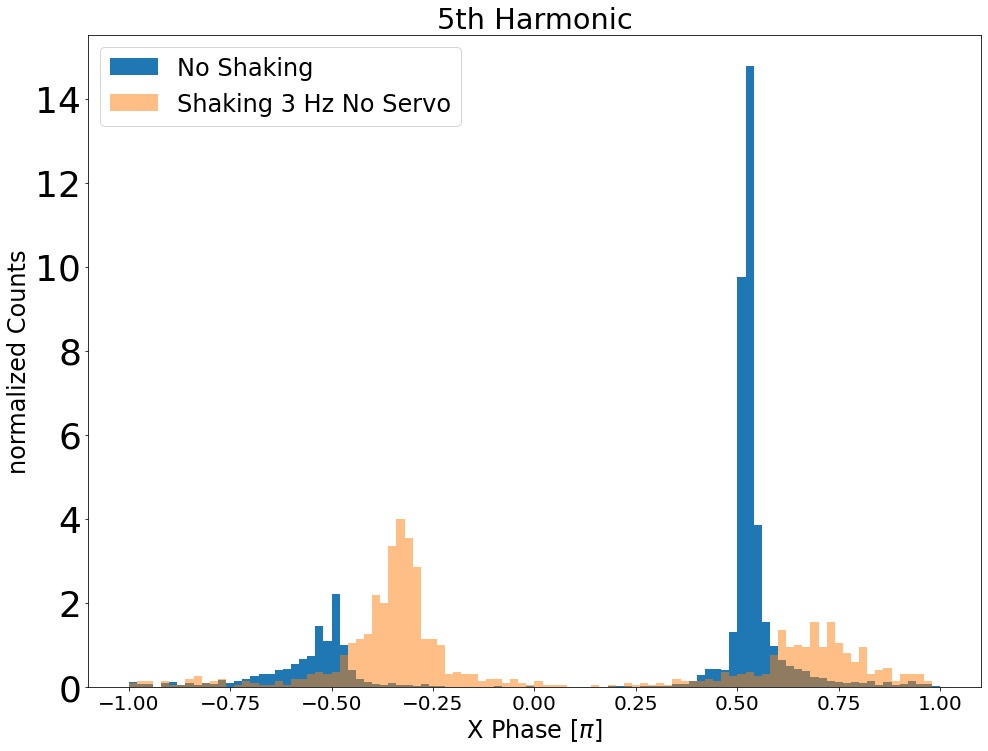

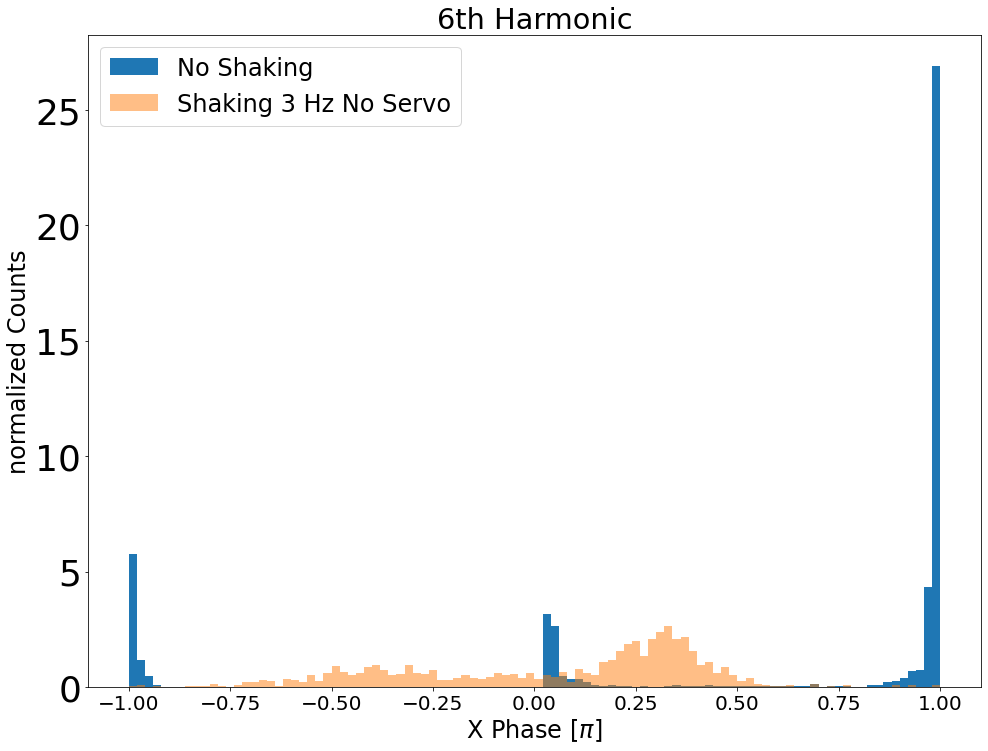

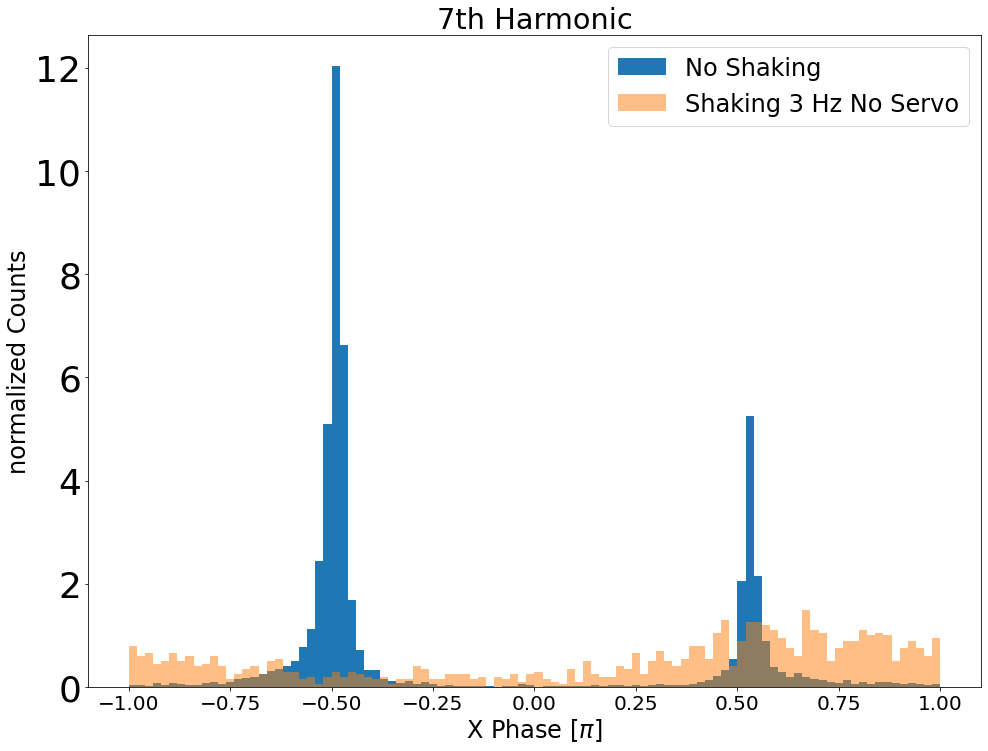

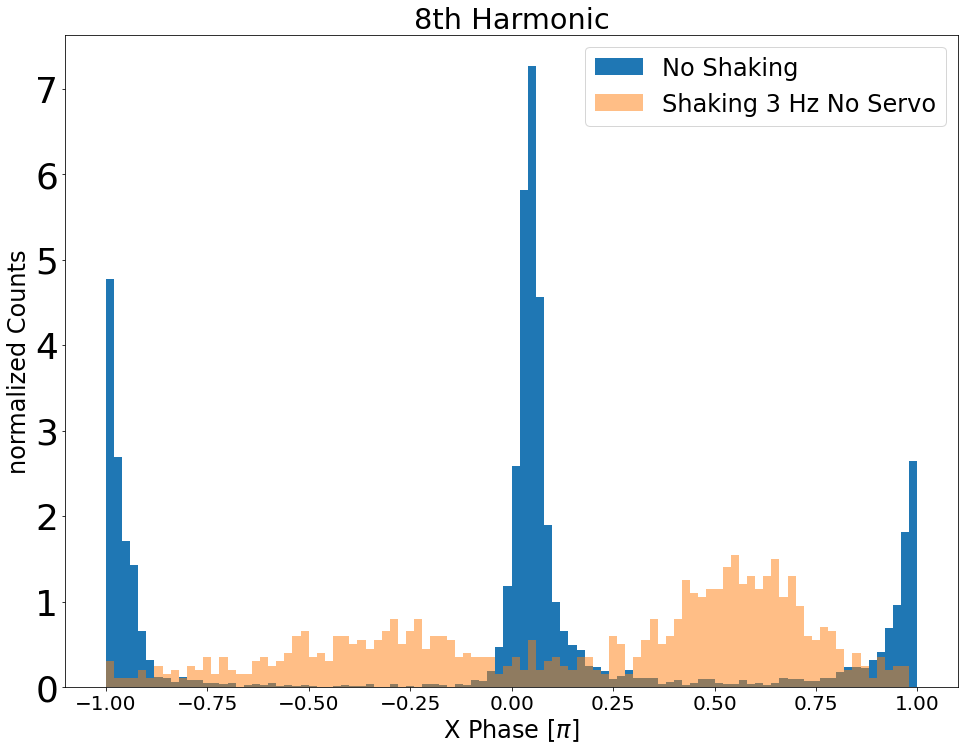

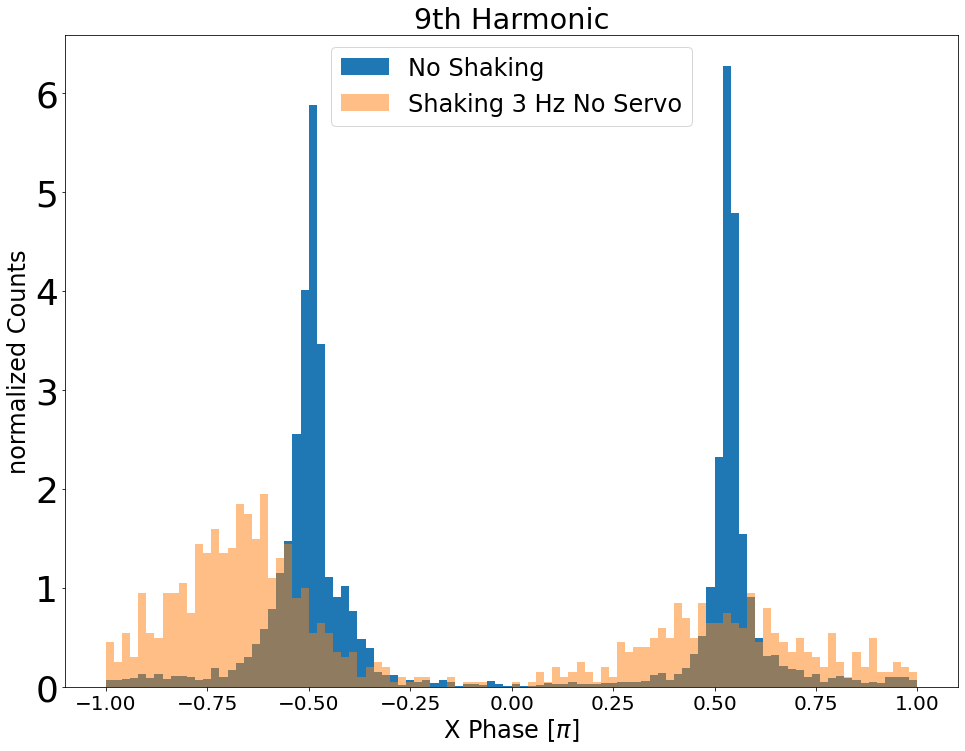

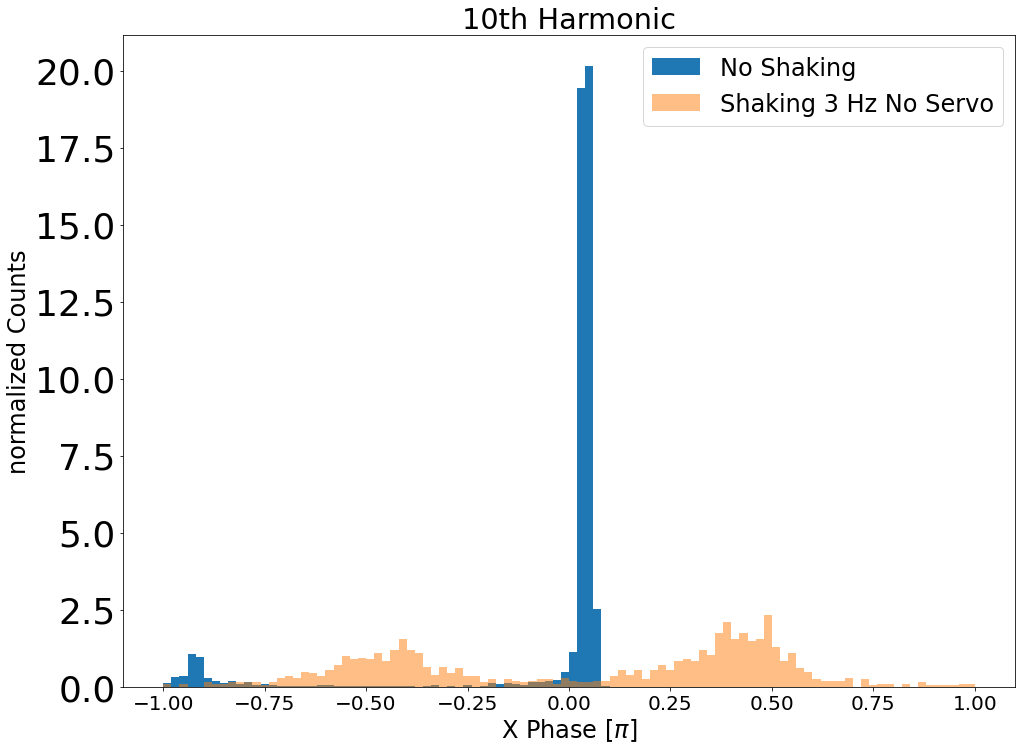

In [16]:
frequency=3
df0=df_ShakingW
df1=df_Shaking13

for j in range(10):
    PhaseListX0 = []
    PhaseListX1 = []
    for i in range(len(df0)):
        PhaseListX0.append(df0["xPhase"][i][int(res/fsamp)*frequency*(j+1)]/np.pi)
    for i in range(len(df1)):
        PhaseListX1.append(df1["xPhase"][i][int(res/fsamp)*13*(j+1)]/np.pi)
    plt.title("%sth Harmonic" %(j+1))    
    plt.xlabel("X Phase [$\pi$]")
    plt.ylabel("normalized Counts")
    plt.hist(PhaseListX0,bins=100,range=(-1,1),label="No Shaking",density=True)
    plt.hist(PhaseListX1,bins=100,range=(-1,1),label="Shaking %s Hz No Servo" %frequency,alpha=0.5,density=True)
    #plt.axvline(df_Shaking13["driveFFT"][0][j]/np.pi,ls="dashed",color="red",lw=7)
    plt.legend()
    plt.show()